In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import log_loss
sns.set()
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

from scipy import stats
from __future__ import division

import statsmodels.api as sm

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from scipy.stats import randint as sp_randint
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample


from sklearn import metrics
from imblearn.pipeline import Pipeline, make_pipeline


In [2]:
df_99 = pd.read_csv('Trial_99_Cleaned')

In [3]:
df_51 = pd.read_csv('Trial_051_Cleaned')

## Combine both the data frames

In [4]:

df = pd.concat([df_99,df_51], ignore_index=True)

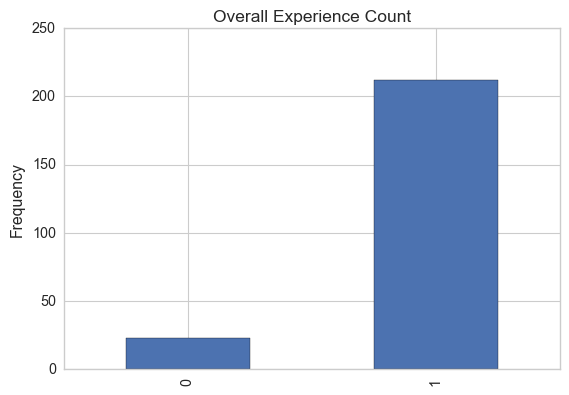

In [112]:
df.groupby(['Overall_Exp_Rating']).size().plot(kind='bar')
plt.title('Overall Experience Count')
plt.ylabel('Frequency')
plt.xlabel(' ')

In [5]:
#mapping the overall experience rating to a binary outcome
rating = {'Excellent': 'High',
          'Good':'High',
          'No effect': 'Low',
          'Not good':'Low',
          'Awful': "Low"}
df['Overall_Exp_Rating'] = df['Overall_Experience'].map(rating)

In [6]:
df['Overall_Exp_Rating']=df['Overall_Exp_Rating'].map({'High': 1, 'Low':0})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 23 columns):
Start_Date                         235 non-null object
End_Date                           235 non-null object
Last_Name                          235 non-null object
Version_Duration                   235 non-null object
Sleep_Quality                      232 non-null object
Overall_Experience                 235 non-null object
Focus_Atten_Concen                 233 non-null object
Memory                             233 non-null object
Drive_Passion_Motivation           233 non-null object
Physical_Energy                    233 non-null object
Capacity_Productivity              232 non-null object
Decisiveness                       233 non-null object
Verbal_Fluency_Word_Recall         229 non-null object
Creativity_Insight                 231 non-null object
InterpersonalCapability_Empathy    232 non-null object
Emotional_Stability                233 non-null object
Euphoria_Joy_Ha

In [8]:
df['Sleep_Quality'] = df['Sleep_Quality'].astype('category')
df['Sleep_Quality'] = df['Sleep_Quality'].cat.reorder_categories(['Poor', 'OK','Excellent'], ordered=True)
df['Sleep_Quality'] = df['Sleep_Quality'].cat.codes

In [9]:
feat =  [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16] 

In [10]:
df[feat].head()

,Focus_Atten_Concen,Memory,Drive_Passion_Motivation,Physical_Energy,Capacity_Productivity,Decisiveness,Verbal_Fluency_Word_Recall,Creativity_Insight,InterpersonalCapability_Empathy,Emotional_Stability,Euphoria_Joy_Happiness
0,Improved,Improved,Improved,Improved,Improved,Improved,No effect,No effect,No effect,No effect,No effect
1,Improved,No effect,No effect,Improved,Improved,No effect,No effect,No effect,No effect,Improved,Improved
2,Improved,Improved,Less good,Less good,Less good,Improved,Improved,Improved,Improved,No effect,No effect
3,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved,No effect,No effect,No effect
4,Improved,No effect,Improved,Improved,Improved,No effect,No effect,No effect,No effect,No effect,Improved


In [11]:
for col in df[feat]:
    df[col] = df[col].astype('category')
    df[col]= df[col].cat.reorder_categories(['Less good', 'No effect', 'Improved'], ordered=True)
    df[col] = df[col].cat.codes

In [12]:
df['Creativity_Insight'].value_counts()

 2    122
 1    106
-1      4
 0      3
Name: Creativity_Insight, dtype: int64

In [13]:
df['Estimated_Effect_Duration'] = df['Estimated_Effect_Duration'].astype('category')
df['Estimated_Effect_Duration'] = df['Estimated_Effect_Duration'].cat.reorder_categories(['<2', '2-4', '4-8','8+'], ordered=True)
df['Estimated_Effect_Duration'] = df['Estimated_Effect_Duration'].cat.codes

In [14]:
df['Overall_Experience'] = df['Overall_Experience'].astype('category')
df['Overall_Experience'] = df['Overall_Experience'].cat.reorder_categories(['Awful','Not good','No effect','Good', 'Excellent'], ordered=True)
df['Overall_Experience'] = df['Overall_Experience'].cat.codes

In [15]:
df['User_Status'] = df['User_Status'].astype('category')
df['User_Status'] = df['User_Status'].cat.reorder_categories(['Non-user', 'XNootropic User'], ordered=True)
df['User_Status'] = df['User_Status'].cat.codes

In [16]:
features = [  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22]

In [17]:
#this is the numeric dataframe
numeric_df = df[features]

In [18]:
numeric_df.head()

,Sleep_Quality,Focus_Atten_Concen,Memory,Drive_Passion_Motivation,Physical_Energy,Capacity_Productivity,Decisiveness,Verbal_Fluency_Word_Recall,Creativity_Insight,InterpersonalCapability_Empathy,Emotional_Stability,Euphoria_Joy_Happiness,Estimated_Effect_Duration,User_Status,Overall_Exp_Rating
0,1,2,2,2,2,2,2,1,1,1,1,1,2,0,1
1,1,2,1,1,2,2,1,1,1,1,2,2,2,0,1
2,1,2,2,0,0,0,2,2,2,2,1,1,3,1,0
3,1,2,2,2,2,2,2,2,2,1,1,1,3,1,1
4,1,2,1,2,2,2,1,1,1,1,1,2,2,1,1


## Data is transformed into arrays

In [19]:
f = [4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22]

In [20]:
data = df[features] # trying to see if we can keep column names
y = data.Overall_Exp_Rating
X = data.drop(['Overall_Exp_Rating'], axis=1)

In [21]:
def cross_validate_model (model):
    """using CV for model selection"""
    scoring = ['accuracy', 'roc_auc', 'f1', 'precision','recall']
    for scores in scoring:
        cv_model = cross_validate(model, X,y, cv=StratifiedKFold(10), scoring=scores, return_train_score=True)
    
        print (str(scores))
        for cv in sorted(cv_model):
            print (str(cv) + ': {}'.format(cv_model[cv].mean()))
        print ('\t')
    
    predictions = cross_val_predict(model, X,y, cv=StratifiedKFold(10))
    
    print(metrics.classification_report(y, predictions))
    print (metrics.confusion_matrix(y, predictions))

In [22]:
#SVM rbf
cross_validate_model(SVC()) 

accuracy
fit_time: 0.00665881633759
score_time: 0.000603175163269
test_score: 0.961746376812
train_score: 0.977771851833
	
roc_auc
fit_time: 0.0027458190918
score_time: 0.00121138095856
test_score: 0.952597402597
train_score: 0.975731468724
	
f1
fit_time: 0.00277752876282
score_time: 0.00110425949097
test_score: 0.978447479287
train_score: 0.987670718371
	
precision
fit_time: 0.00314481258392
score_time: 0.00117478370667
test_score: 0.97766798419
train_score: 0.987949049129
	
recall
fit_time: 0.00279881954193
score_time: 0.00113656520844
test_score: 0.980952380952
train_score: 0.987418021494
	
             precision    recall  f1-score   support

          0       0.82      0.78      0.80        23
          1       0.98      0.98      0.98       212

avg / total       0.96      0.96      0.96       235

[[ 18   5]
 [  4 208]]


In [23]:
#SVM linear 
cross_validate_model(SVC(kernel='linear')) 

accuracy
fit_time: 0.00377435684204
score_time: 0.000618267059326
test_score: 0.910963768116
train_score: 0.961226478967
	
roc_auc
fit_time: 0.00298478603363
score_time: 0.00112867355347
test_score: 0.912121212121
train_score: 0.964837604482
	
f1
fit_time: 0.00285425186157
score_time: 0.00108008384705
test_score: 0.950137448504
train_score: 0.978638438569
	
precision
fit_time: 0.00290350914001
score_time: 0.00124940872192
test_score: 0.950178806701
train_score: 0.973124037607
	
recall
fit_time: 0.00301742553711
score_time: 0.00113425254822
test_score: 0.95303030303
train_score: 0.984279415817
	
             precision    recall  f1-score   support

          0       0.55      0.52      0.53        23
          1       0.95      0.95      0.95       212

avg / total       0.91      0.91      0.91       235

[[ 12  11]
 [ 10 202]]


In [24]:
#logistic regression
cross_validate_model(LogisticRegression()) 

accuracy
fit_time: 0.0104569196701
score_time: 0.000512957572937
test_score: 0.940884057971
train_score: 0.945638043288
	
roc_auc
fit_time: 0.00269455909729
score_time: 0.000969338417053
test_score: 0.927705627706
train_score: 0.97504016586
	
f1
fit_time: 0.00302872657776
score_time: 0.00116457939148
test_score: 0.968058978898
train_score: 0.97048282952
	
precision
fit_time: 0.00305590629578
score_time: 0.001154088974
test_score: 0.947233201581
train_score: 0.9512042724
	
recall
fit_time: 0.00296151638031
score_time: 0.00122230052948
test_score: 0.990692640693
train_score: 0.99056764949
	
             precision    recall  f1-score   support

          0       0.85      0.48      0.61        23
          1       0.95      0.99      0.97       212

avg / total       0.94      0.94      0.93       235

[[ 11  12]
 [  2 210]]


In [25]:
#randomforest
cross_validate_model(RandomForestClassifier()) 

accuracy
fit_time: 0.0678020477295
score_time: 0.00194973945618
test_score: 0.944702898551
train_score: 0.995743496719
	
roc_auc
fit_time: 0.0488309144974
score_time: 0.00233514308929
test_score: 0.949098124098
train_score: 0.999673122597
	
f1
fit_time: 0.0490444421768
score_time: 0.00235035419464
test_score: 0.969196271557
train_score: 0.997121077288
	
precision
fit_time: 0.0490883588791
score_time: 0.00233798027039
test_score: 0.974242424242
train_score: 0.996866819372
	
recall
fit_time: 0.0487249135971
score_time: 0.00237798690796
test_score: 0.962337662338
train_score: 0.997903003582
	
             precision    recall  f1-score   support

          0       0.62      0.65      0.64        23
          1       0.96      0.96      0.96       212

avg / total       0.93      0.93      0.93       235

[[ 15   8]
 [  9 203]]


In [26]:
cross_validate_model(ExtraTreesClassifier()) 

accuracy
fit_time: 0.0462831735611
score_time: 0.00180480480194
test_score: 0.940702898551
train_score: 0.996217430368
	
roc_auc
fit_time: 0.0457469940186
score_time: 0.00245661735535
test_score: 0.922041847042
train_score: 0.999898889895
	
f1
fit_time: 0.0457366228104
score_time: 0.0025728225708
test_score: 0.966877430978
train_score: 0.997897492365
	
precision
fit_time: 0.0463656663895
score_time: 0.0024706363678
test_score: 0.973320158103
train_score: 1.0
	
recall
fit_time: 0.0457246780396
score_time: 0.00259983539581
test_score: 0.976406926407
train_score: 0.995806007165
	
             precision    recall  f1-score   support

          0       0.74      0.74      0.74        23
          1       0.97      0.97      0.97       212

avg / total       0.95      0.95      0.95       235

[[ 17   6]
 [  6 206]]


## Feature Selection with KFold

In [27]:
def plot_nfeat(model):
    """preforms a recursive feature elimination with cross validation, using 
    whatever scoring you like"""
    score_metric = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']
    f, ax = plt.subplots(sharey=True)
    for s in score_metric:
        selector = RFECV(model, step=1, cv=StratifiedKFold(10), scoring=s)
        selector.fit(X,y)                
        print ('Scoring: {}'.format(s))
        print ('Optimal Number of Features = {}'.format(selector.n_features_))
        headers = ['Name', 'Ranking']
        values = sorted(zip(X.columns, selector.ranking_))
        top_feat = filter(lambda x:x[:][1]==1, values)
    
        top_feats = []
        top_feats.append(top_feat)
        unique_feats = np.unique((np.array(top_feats)))
        top_features = unique_feats.tolist()
        print (top_features[1:])
        print ('\t')
        
        
        plt.xlabel('Number of Features Selected')
        plt.ylabel('Cross Validation Score')
        plt.plot(range(1,len(selector.grid_scores_)+1), selector.grid_scores_, label=s)
        plt.title('Optimal Number of Features')
        plt.legend()

Scoring: accuracy
Optimal Number of Features = 2
['InterpersonalCapability_Empathy', 'Physical_Energy']
	
Scoring: roc_auc
Optimal Number of Features = 5
['Drive_Passion_Motivation', 'Focus_Atten_Concen', 'InterpersonalCapability_Empathy', 'Physical_Energy', 'Sleep_Quality']
	
Scoring: f1
Optimal Number of Features = 2
['InterpersonalCapability_Empathy', 'Physical_Energy']
	
Scoring: precision
Optimal Number of Features = 11
['Decisiveness', 'Drive_Passion_Motivation', 'Emotional_Stability', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'InterpersonalCapability_Empathy', 'Physical_Energy', 'Sleep_Quality', 'User_Status', 'Verbal_Fluency_Word_Recall']
	
Scoring: recall
Optimal Number of Features = 4
['Drive_Passion_Motivation', 'Focus_Atten_Concen', 'InterpersonalCapability_Empathy', 'Physical_Energy']
	


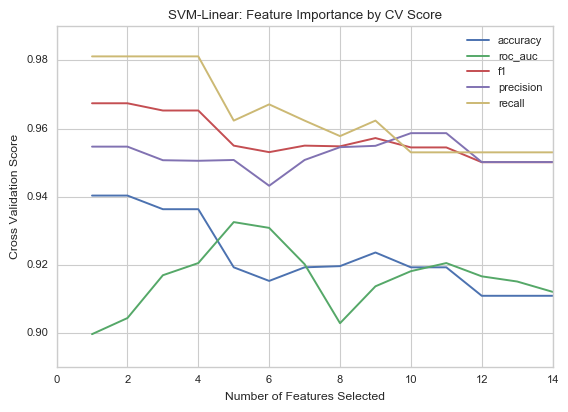

In [28]:
plot_nfeat(SVC(kernel='linear'))
plt.title('SVM-Linear: Feature Importance by CV Score')

Scoring: accuracy
Optimal Number of Features = 14
['Capacity_Productivity', 'Creativity_Insight', 'Decisiveness', 'Drive_Passion_Motivation', 'Emotional_Stability', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'InterpersonalCapability_Empathy', 'Memory', 'Physical_Energy', 'Sleep_Quality', 'User_Status', 'Verbal_Fluency_Word_Recall']
	
Scoring: roc_auc
Optimal Number of Features = 8
['Drive_Passion_Motivation', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'InterpersonalCapability_Empathy', 'Memory', 'Physical_Energy', 'Sleep_Quality']
	
Scoring: f1
Optimal Number of Features = 14
['Capacity_Productivity', 'Creativity_Insight', 'Decisiveness', 'Drive_Passion_Motivation', 'Emotional_Stability', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'InterpersonalCapability_Empathy', 'Memory', 'Physical_Energy', 'Sleep_Quality', 'User_Status', 'Verbal_Fluency_Word_Recall']
	
Scoring: precision
Optimal Nu

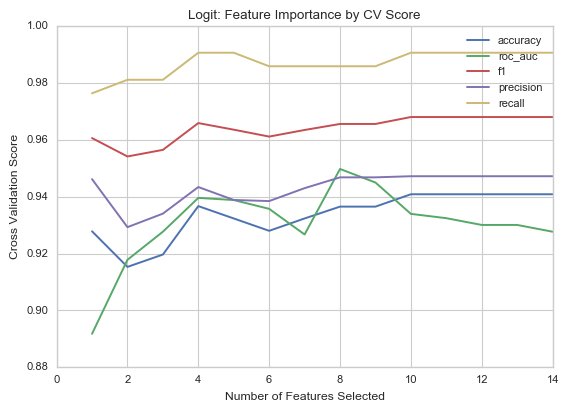

In [29]:
#logit
plot_nfeat(LogisticRegression())
plt.title('Logit: Feature Importance by CV Score')

Scoring: accuracy
Optimal Number of Features = 12
['Capacity_Productivity', 'Creativity_Insight', 'Decisiveness', 'Drive_Passion_Motivation', 'Emotional_Stability', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'Memory', 'Physical_Energy', 'Sleep_Quality', 'Verbal_Fluency_Word_Recall']
	
Scoring: roc_auc
Optimal Number of Features = 13
['Capacity_Productivity', 'Creativity_Insight', 'Decisiveness', 'Drive_Passion_Motivation', 'Emotional_Stability', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'InterpersonalCapability_Empathy', 'Physical_Energy', 'Sleep_Quality', 'User_Status', 'Verbal_Fluency_Word_Recall']
	
Scoring: f1
Optimal Number of Features = 5
['Drive_Passion_Motivation', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'Physical_Energy']
	
Scoring: precision
Optimal Number of Features = 9
['Capacity_Productivity', 'Decisiveness', 'Drive_Passion_Motivation', 'Estimated_Effect_Duration', 'E

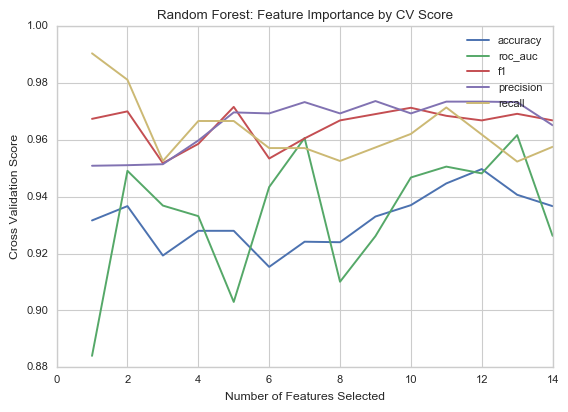

In [30]:
plot_nfeat(RandomForestClassifier())
plt.title('Random Forest: Feature Importance by CV Score')

Scoring: accuracy
Optimal Number of Features = 12
['Capacity_Productivity', 'Creativity_Insight', 'Decisiveness', 'Drive_Passion_Motivation', 'Emotional_Stability', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'Memory', 'Physical_Energy', 'Sleep_Quality', 'Verbal_Fluency_Word_Recall']
	
Scoring: roc_auc
Optimal Number of Features = 14
['Capacity_Productivity', 'Creativity_Insight', 'Decisiveness', 'Drive_Passion_Motivation', 'Emotional_Stability', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'InterpersonalCapability_Empathy', 'Memory', 'Physical_Energy', 'Sleep_Quality', 'User_Status', 'Verbal_Fluency_Word_Recall']
	
Scoring: f1
Optimal Number of Features = 9
['Capacity_Productivity', 'Decisiveness', 'Drive_Passion_Motivation', 'Estimated_Effect_Duration', 'Euphoria_Joy_Happiness', 'Focus_Atten_Concen', 'Physical_Energy', 'Sleep_Quality', 'Verbal_Fluency_Word_Recall']
	
Scoring: precision
Optimal Number of Features = 10
['

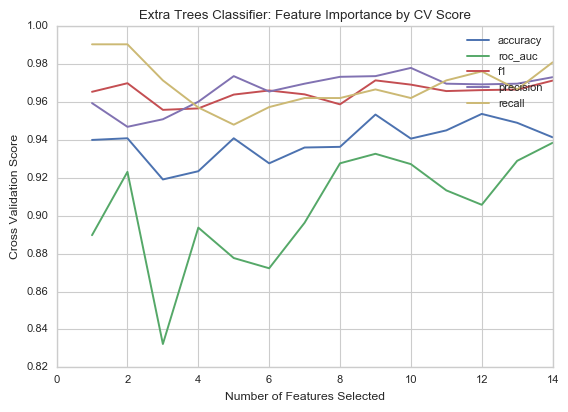

In [31]:
#extratrees
plot_nfeat(ExtraTreesClassifier())
plt.title('Extra Trees Classifier: Feature Importance by CV Score')

                                    Score
Name                                     
Physical_Energy                  0.212370
Estimated_Effect_Duration        0.162801
Focus_Atten_Concen               0.142584
Decisiveness                     0.081478
Drive_Passion_Motivation         0.077641
Sleep_Quality                    0.055773
Euphoria_Joy_Happiness           0.049334
Verbal_Fluency_Word_Recall       0.047719
Capacity_Productivity            0.038853
InterpersonalCapability_Empathy  0.037355
Memory                           0.029878
User_Status                      0.029322
Emotional_Stability              0.027055
Creativity_Insight               0.007836


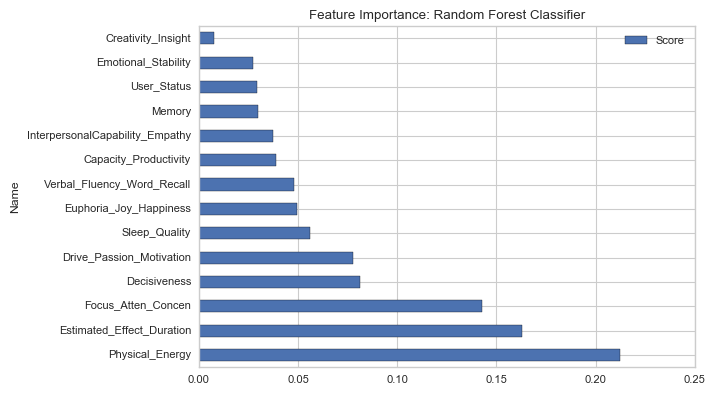

In [32]:
#using RandomForest classifier 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)
headers= ['Name', 'Score']
values = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x:x[1]* -1)
df_2 = pd.DataFrame(data=values, columns=headers).set_index('Name')
print (df_2)
df_2.plot(kind='barh')
plt.title('Feature Importance: Random Forest Classifier')

                                    Score
Name                                     
Physical_Energy                  0.205440
Estimated_Effect_Duration        0.151466
Drive_Passion_Motivation         0.145052
Focus_Atten_Concen               0.121922
Verbal_Fluency_Word_Recall       0.086039
Capacity_Productivity            0.055618
Euphoria_Joy_Happiness           0.048816
Decisiveness                     0.042715
Emotional_Stability              0.032650
User_Status                      0.032060
Sleep_Quality                    0.030180
Memory                           0.024116
Creativity_Insight               0.013095
InterpersonalCapability_Empathy  0.010829


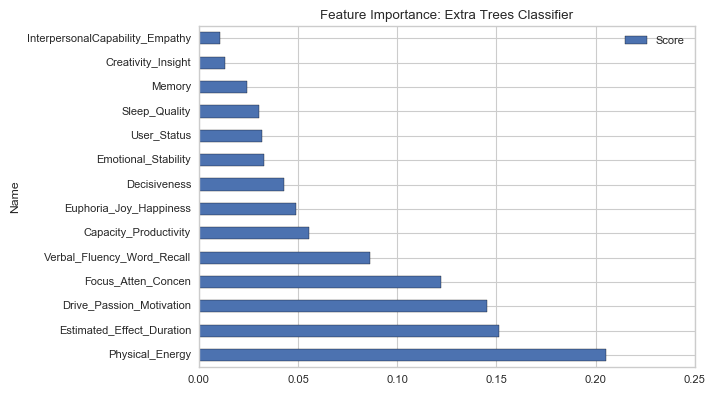

In [33]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
headers= ['Name', 'Score']
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x:x[1]* -1)
df_2 = pd.DataFrame(data=values, columns=headers).set_index('Name')
print (df_2)
df_2.plot(kind='barh')
plt.title('Feature Importance: Extra Trees Classifier')

# Parameter Tuning with GridSearchCV

In [34]:
logit_params = {'C': [0.001,0.01, 0.1, 1, 10, 100]}

In [35]:
Cs = [0.001, 0.01, 0.1, 1, 10, 50, 100]
g = np.logspace(-1,0,10)

svm_params = [{'kernel': ['rbf'], 'gamma': g,
                     'C': Cs},
                    {'kernel': ['linear'], 'C': Cs}]

In [36]:
RF_params = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
n_iter_search = 20


# Fixing Class Imbalance issue

Down-Sample Majority Class: 

-Good for smaller datasets

-Randomy removes observations from majority class which prevents its signal from dominating the learning algorithm

-resamples majority class without replacement so that it matches the minority class. 

# Using Imbalance -SMOTE algorithm

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)


In [62]:
y_test.value_counts()

1    64
0     7
Name: Overall_Exp_Rating, dtype: int64

In [63]:
sm = SMOTE(random_state=12, ratio='minority')
#changing the X_train and y_train
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [64]:
np.unique(y_train_res, return_counts=True)

(array([0, 1]), array([148, 148]))

In [41]:
def smote_pipeline(model, params):
    """fixes the class imbalance issue using SMOTE
    GridSearchCV uss 10 fold CV for each scoring metric
    
    
    
    """
    scoring = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']
    
    #gather data for each scoring metric
    for score_metric in scoring:
        model_cv = GridSearchCV(model, param_grid=params, cv=StratifiedKFold(10), scoring=score_metric)
        model_cv.fit(X_train_res, y_train_res)
    
        print (str(score_metric))
        print ('Best Score for Training Data: {}'.format(model_cv.best_score_))
        print(model_cv.best_params_)


        y_pred = model_cv.predict(X_test)

        print('Test Data Score: {}'.format(model_cv.score(X_test, y_test)))

        print (classification_report(y_test, y_pred, target_names=['Low', 'High']))
        print (confusion_matrix(y_test,y_pred))
        best_model = model_cv.best_estimator_

        print('Sanity Check: {}'.format(best_model.fit(X_train_res, y_train_res).score(X_test, y_test)))
        print ('\t')


In [42]:
smote_pipeline(SVC(), svm_params)

accuracy
Best Score for Training Data: 0.996621621622
{'kernel': 'rbf', 'C': 1, 'gamma': 0.5994842503189409}
Test Data Score: 0.943661971831
             precision    recall  f1-score   support

        Low       1.00      0.43      0.60         7
       High       0.94      1.00      0.97        64

avg / total       0.95      0.94      0.93        71

[[ 3  4]
 [ 0 64]]
Sanity Check: 0.943661971831
	
roc_auc
Best Score for Training Data: 1.0
{'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
Test Data Score: 0.8515625
             precision    recall  f1-score   support

        Low       1.00      0.57      0.73         7
       High       0.96      1.00      0.98        64

avg / total       0.96      0.96      0.95        71

[[ 4  3]
 [ 0 64]]
Sanity Check: 0.957746478873
	
f1
Best Score for Training Data: 0.996505125815
{'kernel': 'rbf', 'C': 1, 'gamma': 0.5994842503189409}
Test Data Score: 0.969696969697
             precision    recall  f1-score   support

        Low       1.00      0.4

In [107]:
smote_pipeline(LogisticRegression(penalty='l2'), logit_params)

accuracy
Best Score for Training Data: 0.986486486486
{'C': 1}
Test Data Score: 0.845070422535
             precision    recall  f1-score   support

        Low       0.33      0.57      0.42         7
       High       0.95      0.88      0.91        64

avg / total       0.89      0.85      0.86        71

[[ 4  3]
 [ 8 56]]
Sanity Check: 0.845070422535
	
roc_auc
Best Score for Training Data: 0.992760617761
{'C': 1}
Test Data Score: 0.886160714286
             precision    recall  f1-score   support

        Low       0.33      0.57      0.42         7
       High       0.95      0.88      0.91        64

avg / total       0.89      0.85      0.86        71

[[ 4  3]
 [ 8 56]]
Sanity Check: 0.845070422535
	
f1
Best Score for Training Data: 0.985762240073
{'C': 1}
Test Data Score: 0.910569105691
             precision    recall  f1-score   support

        Low       0.33      0.57      0.42         7
       High       0.95      0.88      0.91        64

avg / total       0.89      0.8

## Random Forest

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
scoring = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']

for score_metric in scoring:
    model_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=RF_params,
                                   n_iter=n_iter_search, cv=StratifiedKFold(10),scoring=score_metric)

    model_cv.fit(X_train, y_train)
    print (str(score_metric))
    print ('Training  Score: {}'.format(model_cv.best_score_))
    print ('Best Parameters: {}'.format(model_cv.best_params_))
    print('Test Score Test: {}'.format(model_cv.score(X_test,y_test)))
    score = RandomForestClassifier(bootstrap=model_cv.best_estimator_.bootstrap, min_samples_leaf=model_cv.best_estimator_.min_samples_leaf,
                             min_samples_split=model_cv.best_estimator_.min_samples_split, criterion=model_cv.best_estimator_.criterion,
                             max_features=model_cv.best_estimator_.max_features, max_depth=model_cv.best_estimator_.max_depth).fit(X_train, y_train).score(X_test, y_test)
    print('Sanity Check: {}'.format(score))
    y_pred = model_cv.predict(X_test)
    print("\t")
    print (classification_report(y_test, y_pred))
    print (confusion_matrix(y_test, y_pred))
    print ('\t')

accuracy
Training  Score: 0.975609756098
Best Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'max_features': 1, 'criterion': 'gini', 'min_samples_split': 3, 'max_depth': None}
Test Score Test: 0.957746478873
Sanity Check: 0.943661971831
	
             precision    recall  f1-score   support

          0       0.83      0.71      0.77         7
          1       0.97      0.98      0.98        64

avg / total       0.96      0.96      0.96        71

[[ 5  2]
 [ 1 63]]
	
roc_auc
Training  Score: 0.939634146341
Best Parameters: {'bootstrap': True, 'min_samples_leaf': 10, 'max_features': 10, 'criterion': 'entropy', 'min_samples_split': 2, 'max_depth': 3}
Test Score Test: 0.989955357143
Sanity Check: 0.943661971831
	
             precision    recall  f1-score   support

          0       1.00      0.14      0.25         7
          1       0.91      1.00      0.96        64

avg / total       0.92      0.92      0.89        71

[[ 1  6]
 [ 0 64]]
	
f1
Training  Score: 0.9738450073

# Multicategory Random Forest

In [45]:
#data = df[features] # trying to see if we can keep column names
#y_rf = df.Overall_Experience
#X_rf = data.drop(['Overall_Exp_Rating'], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(
#    X_rf, y_rf, test_size=0.30)

In [46]:
data = df[features] # trying to see if we can keep column names
y_rf = df.Overall_Experience
X_rf = data.drop(['Overall_Exp_Rating'], axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_rf, y_rf, test_size=0.30)



model_cv = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced'), param_distributions=RF_params,
                                   n_iter=n_iter_search, cv=StratifiedKFold(10), scoring='accuracy', )
model_cv.fit(X_train, y_train)
print (str(score_metric))
print ('Training  Score: {}'.format(model_cv.best_score_))
print ('Best Parameters: {}'.format(model_cv.best_params_))
print('Test  Score Test: {}'.format(model_cv.score(X_test,y_test)))
score = RandomForestClassifier(class_weight='balanced',bootstrap=model_cv.best_estimator_.bootstrap, min_samples_leaf=model_cv.best_estimator_.min_samples_leaf,
                             min_samples_split=model_cv.best_estimator_.min_samples_split, criterion=model_cv.best_estimator_.criterion,
                             max_features=model_cv.best_estimator_.max_features, max_depth=model_cv.best_estimator_.max_depth, ).fit(X_train, y_train).score(X_test, y_test)
print('Sanity Check: {}'.format(score))
y_pred = model_cv.predict(X_rf)
print("\t")
print (classification_report(y_rf, y_pred))
print (confusion_matrix(y_rf, y_pred))
print ('\t')

/Users/macbook/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


recall
Training  Score: 0.634146341463
Best Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'max_features': 1, 'criterion': 'entropy', 'min_samples_split': 10, 'max_depth': None}
Test  Score Test: 0.704225352113
Sanity Check: 0.661971830986
	
             precision    recall  f1-score   support

          0       0.62      1.00      0.77         5
          1       0.83      0.71      0.77         7
          2       0.61      1.00      0.76        11
          3       0.88      0.81      0.84       133
          4       0.80      0.81      0.81        79

avg / total       0.83      0.82      0.82       235

[[  5   0   0   0   0]
 [  1   5   0   1   0]
 [  0   0  11   0   0]
 [  2   0   7 108  16]
 [  0   1   0  14  64]]
	


# With Selected Important Features

In [48]:
# with selected features for SVM

In [49]:
X_ft = data[['Drive_Passion_Motivation', 'Focus_Atten_Concen', 'InterpersonalCapability_Empathy', 'Physical_Energy']]
X_train, X_test, y_train, y_test = train_test_split(X_ft, y, test_size=.30)


In [50]:
sm = SMOTE(random_state=12, ratio='minority')
#changing the X_train and y_train
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [51]:
smote_pipeline(SVC(), svm_params)

accuracy
Best Score for Training Data: 0.965753424658
{'kernel': 'rbf', 'C': 10, 'gamma': 1.0}
Test Data Score: 0.971830985915
             precision    recall  f1-score   support

        Low       0.71      1.00      0.83         5
       High       1.00      0.97      0.98        66

avg / total       0.98      0.97      0.97        71

[[ 5  0]
 [ 2 64]]
Sanity Check: 0.971830985915
	
roc_auc
Best Score for Training Data: 0.991519895629
{'kernel': 'rbf', 'C': 50, 'gamma': 0.1291549665014884}
Test Data Score: 0.984848484848
             precision    recall  f1-score   support

        Low       0.56      1.00      0.71         5
       High       1.00      0.94      0.97        66

avg / total       0.97      0.94      0.95        71

[[ 5  0]
 [ 4 62]]
Sanity Check: 0.943661971831
	
f1
Best Score for Training Data: 0.96303512161
{'kernel': 'rbf', 'C': 10, 'gamma': 1.0}
Test Data Score: 0.984615384615
             precision    recall  f1-score   support

        Low       0.71      

In [52]:

X_rf = data[['Focus_Atten_Concen', 'Physical_Energy']]
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=.30)
sm = SMOTE(random_state=12, ratio='minority')
#changing the X_train and y_train
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [53]:
scoring = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']
RF_params = {"max_depth": [3, None],
              "max_features": [2],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
for score_metric in scoring:
    model_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=RF_params,
                                   n_iter=n_iter_search, cv=StratifiedKFold(10),scoring=score_metric)

    model_cv.fit(X_train, y_train)
    print (str(score_metric))
    print ('Training  Score: {}'.format(model_cv.best_score_))
    print ('Best Parameters: {}'.format(model_cv.best_params_))
    print('Test Score Test: {}'.format(model_cv.score(X_test,y_test)))
    score = RandomForestClassifier(bootstrap=model_cv.best_estimator_.bootstrap, min_samples_leaf=model_cv.best_estimator_.min_samples_leaf,
                             min_samples_split=model_cv.best_estimator_.min_samples_split, criterion=model_cv.best_estimator_.criterion,
                             max_features=model_cv.best_estimator_.max_features, max_depth=model_cv.best_estimator_.max_depth).fit(X_train, y_train).score(X_test, y_test)
    print('Sanity Check: {}'.format(score))
    y_pred = model_cv.predict(X_test)
    print("\t")
    print (classification_report(y_test, y_pred))
    print (confusion_matrix(y_test, y_pred))
    print ('\t')

accuracy
Training  Score: 0.951219512195
Best Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'max_features': 2, 'criterion': 'gini', 'min_samples_split': 3, 'max_depth': None}
Test Score Test: 0.901408450704
Sanity Check: 0.929577464789
	
             precision    recall  f1-score   support

          0       0.50      0.71      0.59         7
          1       0.97      0.92      0.94        64

avg / total       0.92      0.90      0.91        71

[[ 5  2]
 [ 5 59]]
	
roc_auc
Training  Score: 0.962195121951
Best Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'max_features': 2, 'criterion': 'entropy', 'min_samples_split': 2, 'max_depth': None}
Test Score Test: 0.941964285714
Sanity Check: 0.943661971831
	
             precision    recall  f1-score   support

          0       0.75      0.43      0.55         7
          1       0.94      0.98      0.96        64

avg / total       0.92      0.93      0.92        71

[[ 3  4]
 [ 1 63]]
	
f1
Training  Score: 0.9736470400